https://foss4g.tistory.com/1665

In [1]:
import cv2
import numpy as np
import os
import glob

In [2]:
import matplotlib.pyplot as plt

In [4]:
image_path = './img_capture'

In [5]:
# 체커보드의 차원 정의
CHECKERBOARD = (6,9) # 체커보드 행과 열당 내부 코너 수
#CHECKERBOARD = (6,8) # 체커보드 행과 열당 내부 코너 수
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [6]:
# 각 체커보드 이미지에 대한 3D 점 벡터를 저장할 벡터 생성
objpoints = []
# 각 체커보드 이미지에 대한 2D 점 벡터를 저장할 벡터 생성
imgpoints = [] 
# 3D 점의 세계 좌표 정의
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

In [7]:
images = glob.glob('./img_capture/checkerboard_*.jpg')

In [8]:
images

['./img_capture/checkerboard__img_25.jpg',
 './img_capture/checkerboard__img_6.jpg',
 './img_capture/checkerboard__img_1.jpg',
 './img_capture/checkerboard__img_18.jpg',
 './img_capture/checkerboard__img_28.jpg',
 './img_capture/checkerboard__img_39.jpg',
 './img_capture/checkerboard__img_30.jpg',
 './img_capture/checkerboard__img_40.jpg',
 './img_capture/checkerboard__img_10.jpg',
 './img_capture/checkerboard__img_13.jpg',
 './img_capture/checkerboard__img_16.jpg',
 './img_capture/checkerboard__img_23.jpg',
 './img_capture/checkerboard__img_17.jpg',
 './img_capture/checkerboard__img_38.jpg',
 './img_capture/checkerboard__img_12.jpg',
 './img_capture/checkerboard__img_31.jpg',
 './img_capture/checkerboard__img_22.jpg',
 './img_capture/checkerboard__img_11.jpg',
 './img_capture/checkerboard__img_36.jpg',
 './img_capture/checkerboard__img_27.jpg',
 './img_capture/checkerboard__img_37.jpg',
 './img_capture/checkerboard__img_0.jpg',
 './img_capture/checkerboard__img_32.jpg',
 './img_captur

In [9]:
# 주어진 디렉터리에 저장된 개별 이미지의 경로 추출
# images = glob.glob(image_path + '/*.jpg')
#images = glob.glob('./ImprovedOcamCalib/FisheyeDataSet/test_images/Fisheye1_*.jpg')
for fname in images:
    img = cv2.imread(fname)
    # 그레이 스케일로 변환
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # 체커보드 코너 찾기
    # 이미지에서 원하는 개수의 코너가 발견되면 ret = true
    ret, corners = cv2.findChessboardCorners(gray,
                                             CHECKERBOARD,
                                             cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    # 원하는 개수의 코너가 감지되면,
    # 픽셀 좌표 미세조정 -> 체커보드 이미지 표시
    if ret == True:
        objpoints.append(objp)
        # 주어진 2D 점에 대한 픽셀 좌표 미세조정
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        imgpoints.append(corners2)
        # 코너 그리기 및 표시
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
    cv2.imshow('img',img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()
h,w = img.shape[:2] # 480, 640
# 알려진 3D 점(objpoints) 값과 감지된 코너의 해당 픽셀 좌표(imgpoints) 전달, 카메라 캘리브레이션 수행
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [10]:
mtx, dist

(array([[1.42303426e+03, 0.00000000e+00, 7.41636181e+02],
        [0.00000000e+00, 1.41910478e+03, 4.04239429e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-1.15772526e-02,  1.06809104e+00, -2.45910947e-03,
          3.42649130e-03, -3.49259910e+00]]))

In [11]:
# calibration_matrix_path = './aruco_marker/calibration_matrix_480p.npy'
# distortion_coefficients_path = './aruco_marker/distortion_coefficients_480p.npy'

calibration_matrix_path = './img_capture/calibration_matrix_4.npy'
distortion_coefficients_path = './img_capture/distortion_coefficients_4.npy'

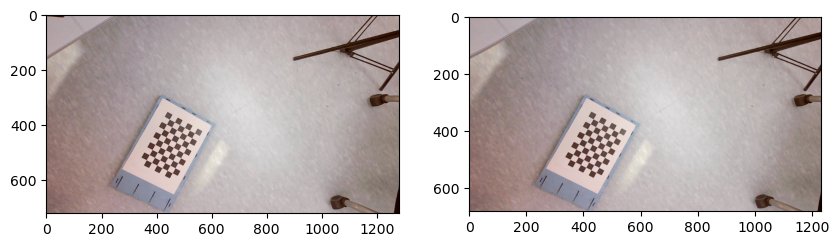

In [13]:
fig = plt.figure(figsize=(10, 10))

for fname in images:
    img = cv2.imread(fname)

    ax1 = plt.subplot(1, 2, 1)
    ax1.imshow(img)

    h,  w = img.shape[:2]
    ####################################################################3    
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

    # undistort
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
     
    # crop the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    ####################################################################3    
    # # undistort
    # mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
    # dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
     
    # # crop the image
    # x, y, w, h = roi
    # dst = dst[y:y+h, x:x+w]
    ####################################################################3    

    ax1 = plt.subplot(1, 2, 2)
    ax1.imshow(dst)

    # cv2.imshow('img',img)
    # cv2.waitKey(0)
    break

cv2.destroyAllWindows()

In [14]:
np.save(calibration_matrix_path, mtx)
np.save(distortion_coefficients_path, dist)

In [2]:
!ls ImprovedOcamCalib/FisheyeDataSet/test_images/

checkerboard_sizes.txt	Fisheye1_6.jpg	 Fisheye2_2.jpg  GOPR2.jpg
Fisheye1_10.jpg		Fisheye1_7.jpg	 Fisheye2_3.jpg  GOPR3.jpg
Fisheye1_11.jpg		Fisheye1_8.jpg	 Fisheye2_4.jpg  GOPR4.jpg
Fisheye1_12.jpg		Fisheye1_9.jpg	 Fisheye2_5.jpg  GOPR5.jpg
Fisheye1_13.jpg		Fisheye2_10.jpg  Fisheye2_6.jpg  GOPR6.jpg
Fisheye1_14.jpg		Fisheye2_11.jpg  Fisheye2_7.jpg  GOPR7.jpg
Fisheye1_15.jpg		Fisheye2_12.jpg  Fisheye2_8.jpg  GOPR8.jpg
Fisheye1_1.jpg		Fisheye2_13.jpg  Fisheye2_9.jpg  GOPR9.jpg
Fisheye1_2.jpg		Fisheye2_14.jpg  GOPR001.JPG	 thumbs1.jpg
Fisheye1_3.jpg		Fisheye2_15.jpg  GOPR10.jpg	 thumbs2.jpg
Fisheye1_4.jpg		Fisheye2_16.jpg  GOPR11.jpg	 thumbs3.jpg
Fisheye1_5.jpg		Fisheye2_1.jpg	 GOPR1.jpg
